<h1 style="text-align: center;">Classifying Housing Prices: A Comparison of Linear and Logistic Regression Approaches</h1>
&nbsp;
&nbsp;

<h2 style="text-align: center;">Ebrahim Asrarhaghighi</h2>

# Summary

This report evaluates the performance of **linear and logistic regression models** for **classifying housing prices** into predefined categories (Low, Medium, and High) using the **Ames Housing dataset**. **Linear regression**, adapted for classification, achieved an **accuracy of 84.17%**, but exhibited limitations due to its regression-focused design. **Logistic regression**, a classifier optimized for categorical outputs, outperformed linear regression with an accuracy of **86.40%** and balanced performance across all categories.

The study employed a structured approach, starting with data preprocessing, which included handling missing values, balancing classes using SMOTE, applying one-hot encoding to categorical variables, performing feature selection based on correlation and multicollinearity analysis, and standardizing features with StandardScaler.
Linear regression was adapted to classification through rounding and clipping predictions, while logistic regression provided probabilistic outputs directly mapped to categories. Residual analysis offered additional insights into linear regression model performance and limitations.

**The study highlights:**

  - The importance of proper data preprocessing, including handling class imbalance with SMOTE, feature selection, One-Hot Encoding and scaling.

  - Insights into model suitability for classification tasks, emphasizing the strengths of logistic regression.

  - A discussion of residual with recommendations for future exploration of advanced classifiers.

This report concludes that logistic regression is a more robust approach for classification tasks in this context.

# Table of Contents

1. **Problem Statement**

2. **Data**
   - 2.1. **Description of the Dataset**
   - 2.2. **Feature Selection**  
       - 2.2.1. Identifying Categorical Variables and One-Hot Encoding  
       - 2.2.2. Exploring Linear Relationships and Selecting Continuous Variables  
       - 2.2.3. Selected Features  
       - 2.2.4. Refining Feature Selection  
       - 2.2.5. Dataset Dimensions After Feature Selection  
   - 2.3. **Handling Missing Values**  
       - 2.3.1. Summary of Missing Values  
       - 2.3.2. Handling Strategy for Missing Values  
   - 2.4. **Class Categorization and Distribution**  
       - 2.4.1. Categorization Process  
       - 2.4.2. Class Distribution Analysis  
   - 2.5. **Multicollinearity Analysis**  
   - 2.6. **Outlier Analysis**  
   - 2.7. **Data Splitting**  
   - 2.8. **Addressing Class Imbalance**  
   - 2.9. **Feature Scaling** 
   
3. **Linear Regression Model**
   - 3.1. **Model Training and Prediction**  
       - 3.1.1. Model Training  
       - 3.1.2. Prediction  
   - 3.2. **Model Evaluation**  
   - 3.3. **Model Refinement**  
       - 3.3.1. OLS Regression Analysis for Model Refinement  
       - 3.3.2. Model Update After Removing Insignificant Variables  
   - 3.4. **Residual Analysis**  
       - 3.4.1. Residual Normality  
       - 3.4.2. Homoscedasticity  
       - 3.4.3. Impact on Results  
       - 3.4.4. Recommendation  
       
4. **Logistic Regression Model**  
   - 4.1. Logistic Regression Results  
   - 4.2. Comparison with Linear Regression  
   - 4.3. Why Logistic Regression Outperforms Linear Regression Even with Balanced Classes   
   
5. **Limitations**  
6. **Conclusion**  

# 1. **Problem Statement**

This project investigates the performance of both linear regression and logistic regression models in solving a classification problem. The chosen dataset is the Ames Housing dataset, which contains detailed information about residential properties. The target variable, `SalePrice`, was transformed into discrete categories (Low, Medium, High) to facilitate classification.

The study explores the feasibility of adapting linear regression, a regression-focused algorithm, to a classification task and compares its performance with logistic regression, a model explicitly designed for classification. 

In [1]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Required for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# 2. Data

## 2.1 Description of the Dataset

The Ames Housing Dataset ([Kaggle Link](https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset)) is a well-known resource in the fields of machine learning and data analysis. It provides detailed information on various features and attributes of residential homes in Ames, Iowa, USA. Although the dataset is predominantly used for regression tasks, particularly for predicting housing prices, it also lends itself to creative applications like classification.

**Key Details:**

- **Number of Instances:** The dataset contains 2,930 observations.
- **Number of Features:** There are 82 features describing various aspects of residential properties.
- **Target Variable:** The target variable is `SalePrice`, representing the sale price of the houses.
- **Data Types:** Features include both numerical and categorical variables, covering diverse aspects such as lot size, number of rooms, location, construction details, and more.

The Ames Housing Dataset is widely recognized in the machine learning community for tasks like regression modeling, feature engineering, and predictive analytics in the real estate domain. Its richness and diversity make it an excellent resource for developing and evaluating machine learning models and techniques.

In [ ]:
# Load the dataset
housing_data = pd.read_csv(".."\DATA\AmesHousing.csv")

In [3]:
# Get the dimensions of the dataset to understand its size.
# Returns the number of rows (instances) and columns (features) in the dataset.
housing_data.shape

(2930, 82)

In [4]:
# Display the first few rows
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2.2 Feature Selection

### **2.2.1 Identifying Categorical Variables and One-Hot Encoding**

#### **Identifying Categorical Variables**
To prepare the dataset for modeling, we reviewed all features to identify categorical variables. These variables represent discrete groups or categories rather than continuous values. Using data type inspection and a review of unique values, we chose the following categorical variable:

- **`Foundation`**: Represents the type of foundation used in the property, with six unique categories:
  - `'PConc'`: Poured concrete (44.71% of properties).
  - `'CBlock'`: Concrete block (42.46% of properties).
  - `'BrkTil'`: Brick and tile (10.61% of properties).
  - `'Slab'`: Slab (1.67% of properties).
  - `'Stone'`: Stone (0.38% of properties).
  - `'Wood'`: Wood (0.17% of properties).

#### **One-Hot Encoding for Categorical Variables**
To make the `Foundation` variable suitable for the linear regression model, we applied one-hot encoding with `drop_first=True`. This method converts the categorical variable into multiple binary columns, dropping the first category (`'BrkTil'`) to serve as the reference baseline. The resulting one-hot encoded columns are:

- **`Foundation_CBlock`**: Represents properties with a concrete block foundation.
- **`Foundation_PConc`**: Represents properties with a poured concrete foundation.
- **`Foundation_Slab`**: Represents properties with a slab foundation.
- **`Foundation_Stone`**: Represents properties with a stone foundation.
- **`Foundation_Wood`**: Represents properties with a wood foundation.

For example:
- A property with `'BrkTil'` will have all the one-hot encoded columns set to `0`.
- A property with `'CBlock'` will have `Foundation_CBlock` set to `1`, while the other columns remain `0`.

#### **Resulting Dataset**
After one-hot encoding:
- The original `Foundation` column was retained in the dataset for descriptive purposes.
- Five new binary columns were added to represent the categorical variable in numeric form for the regression model.

By dropping one category, we avoid multicollinearity while preserving the information necessary for modeling. This ensures that the foundation type is captured effectively and represented in a format suitable for regression analysis.

In [5]:
# Identify categorical columns
categorical_columns = housing_data.select_dtypes(include=['object', 'category', 'bool']).columns

# Print the list of categorical columns
print("Categorical Variables:", categorical_columns.tolist())

Categorical Variables: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [6]:
# Check unique categories in the Neighborhood column
print(housing_data['Foundation'].unique())

['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']


In [7]:
housing_data['Foundation'].value_counts(normalize=True) * 100

Foundation
PConc     44.709898
CBlock    42.457338
BrkTil    10.614334
Slab       1.672355
Stone      0.375427
Wood       0.170648
Name: proportion, dtype: float64

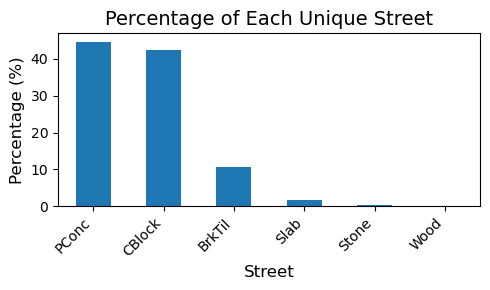

In [8]:
import matplotlib.pyplot as plt

# Calculate the percentage of each unique value
street_percentage = housing_data['Foundation'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(5, 3))
street_percentage.plot(kind='bar')

# Add labels and title
plt.xlabel('Street', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Each Unique Street', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Keep the original 'Foundation' column and create one-hot encoded columns
Foundation_encoded = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first=True)

# Add the one-hot encoded column to the DataFrame without dropping the original column
housing_data = pd.concat([housing_data, Foundation_encoded], axis=1)

# Verify the encoding
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,5,2010,WD,Normal,215000,True,False,False,False,False
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,6,2010,WD,Normal,105000,True,False,False,False,False
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,6,2010,WD,Normal,172000,True,False,False,False,False
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,4,2010,WD,Normal,244000,True,False,False,False,False
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,3,2010,WD,Normal,189900,False,True,False,False,False


### 2.2.2 Exploring Linear Relationships and Selecting Continuous Variables

To determine whether there are any linear relationships between the target variable (`SalePrice`) and the numerical features in the Ames Housing dataset, we performed a correlation analysis. Identifying strong correlations is a crucial step in predictive modeling, as it helps us understand which features may have the most influence on the target variable. This analysis also ensures that the selected features align with the assumptions of linear regression, which performs best when there are linear relationships between the predictors and the target.

#### 2.2.2.1 Why This Step Was Necessary
1. **Feature Selection:** Strongly correlated features are more likely to be good predictors of `SalePrice`. This step allows us to focus on the most relevant variables, improving model performance and interpretability.
2. **Model Suitability:** Linear regression assumes linear relationships between the dependent and independent variables. By analyzing correlations, we can confirm whether this assumption holds true for the dataset.

#### 2.2.2.2 Insights from Correlation Analysis

The correlation analysis provided valuable insights into the relationships between `SalePrice` and various numerical features in the Ames Housing dataset. Key findings include:

1. **Strong Positive Correlations:**
   - `OverallQual` (0.799): Indicates that the overall material and finish quality of a property has the strongest linear relationship with the sale price.
   - `GrLivArea` (0.707): Suggests that the ground living area size is a significant predictor of housing prices.
   - `Garage Cars` (0.648) and `Garage Area` (0.640): Highlight the importance of garage size in determining property value.
   - `Total Bsmt SF` (0.632): Reflects that the size of the basement also contributes strongly to housing prices.

2. **Moderate Positive Correlations:**
   - Features such as `1st Flr SF` (0.622), `Year Built` (0.558), `Full Bath` (0.546), and `Mas Vnr Area` (0.506) show a moderate positive relationship with `SalePrice`, indicating their influence on property valuation.

3. **Weak Positive Correlations:**
   - Variables like `Lot Area` (0.267) and `2nd Flr SF` (0.269) demonstrate weaker linear relationships with `SalePrice`.

4. **Negative Correlations:**
   - Features such as `Enclosed Porch` (-0.129), `Kitchen AbvGr` (-0.120), and `PID` (-0.247) exhibit weak negative relationships, suggesting that they may inversely impact the sale price or have limited predictive value.

5. **Low or Insignificant Correlations:**
   - Features such as `BsmtFin SF 2` (0.005) and `Misc Val` (-0.016) show negligible correlation with `SalePrice`, making them less relevant for predictive modeling.

#### Key Takeaways:
- Features like `OverallQual`, `GrLivArea`, and `Garage Cars` emerge as the most influential predictors of `SalePrice`.
- Some variables with very low or negative correlations may be excluded from the model to reduce noise and improve performance.
- These findings provide a solid foundation for selecting features to include in the subsequent steps of linear regression modeling.

In [10]:
# Select only numerical columns
numerical_data = housing_data.select_dtypes(include=['number'])

# Handle missing values (if any) by filling with the mean
numerical_data = numerical_data.fillna(numerical_data.mean())

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation of all features with SalePrice
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=True)
print(saleprice_corr)

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035815
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005890
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182805
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.275894
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.340751
BsmtFin SF 1       0.432794
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.505784
Garage Yr Blt      0.510684
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632105
Garage Area        0.640385
Garage Cars        0

### **2.2.3 Selected Features**

To streamline the modeling process and improve performance, we selected features with strong or moderate correlations with the target variable, `SalePrice`. Also, we selected the **Foundation** variable as a categorical feature. This step ensures that only the most relevant predictors are included, reducing noise and enhancing model interpretability.

#### **Selected Features**
- **Strong Correlations:**
  - **`Overall Qual`**: Overall material and finish quality of the property.
  - **`Gr Liv Area`**: Above-ground living area size.
  - **`Garage Cars`**: Capacity of cars the garage can hold.
  - **`Garage Area`**: Total area of the garage.
  - **`Total Bsmt SF`**: Total size of the basement.
  - **`1st Flr SF`**: Area of the first floor.
  - **`Year Built`**: Construction year of the property.
  
- **Moderate Correlations:**
  - **`Full Bath`**: Number of full bathrooms.
  - **`Year Remod/Add`**: Year of last remodeling or addition.
  - **`Mas Vnr Area`**: Masonry veneer area.
  - **`Fireplaces`**: Number of fireplaces in the property.

- **Categorical Variable (One-Hot Encoded):** 
   These columns represent the type of foundation for the property:
   - **`Foundation_CBlock:`** 1 for concrete block, 0 otherwise.
   - **`Foundation_PConc:`** 1 for poured concrete, 0 otherwise.
   - **`Foundation_Slab:`** 1 for slab foundation, 0 otherwise.
   - **`Foundation_Stone:`** 1 for stone foundation, 0 otherwise.
   - **`Foundation_Wood:`** 1 for wood foundation, 0 otherwise.

In [11]:
# Select features with strong or moderate correlations
selected_features_check_1 = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
    'Total Bsmt SF', '1st Flr SF', 'Year Built',
    'Full Bath', 'Year Remod/Add', 'Mas Vnr Area', 'Fireplaces', 
    'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 
    'Foundation_Stone', 'Foundation_Wood'
]


# Create a new DataFrame with the selected features and target variable
filtered_data = housing_data[selected_features_check_1 + ['SalePrice']]

### **2.2.4 Refining Feature Selection**

While the initial feature selection focused on identifying variables with strong or moderate correlations with `SalePrice`, a further refinement step was necessary to address multicollinearity. Multicollinearity occurs when two or more features are highly correlated with each other, which can negatively impact the stability and interpretability of the linear regression model.

#### **Multicollinearity Analysis**
To identify multicollinearity among the selected features, a correlation matrix was analyzed. Some features were found to have high correlations with each other, suggesting redundancy in their predictive power. Key observations include:
- **GarageCars** and **GarageArea** (correlation: 0.89): These variables are highly correlated, as they both represent aspects of garage size.
- **1stFlrSF** and **TotalBsmtSF** (correlation: 0.80): These variables are closely related, as larger first floors often correspond to larger basements.
- **YearBuilt** and **YearRemodAdd** (correlation: 0.61): Both features represent temporal aspects of the property, with some overlap in meaning.

#### **Prioritizing Features**
To resolve multicollinearity, the feature with the **higher correlation to `SalePrice`** was retained, while the other was excluded:
- Between **GarageCars** and **GarageArea**, **GarageCars** was retained due to its slightly higher correlation with `SalePrice` (0.648 vs. 0.640).
- Between **1stFlrSF** and **TotalBsmtSF**, **TotalBsmtSF** was retained due to its higher correlation with `SalePrice` (0.632 vs. 0.622).
- Between **YearBuilt** and **YearRemodAdd**, **YearBuilt** was retained due to its higher correlation with `SalePrice` (0.558 vs. 0.533).

#### **Final Feature Set**

After resolving multicollinearity and carefully evaluating the dataset, the final set of selected features includes:

1. **Overall Qual**: Overall material and finish quality.
2. **Gr Liv Area**: Above-ground living area size.
3. **Garage Cars**: Capacity of cars the garage can accommodate.
4. **Total Bsmt SF**: Total size of the basement.
5. **Year Built**: Year the property was constructed.
6. **Full Bath**: Number of full bathrooms.
7. **Mas Vnr Area**: Masonry veneer area.
8. **Fireplaces**: Number of fireplaces.
9. **Foundation_CBlock**: 1 for concrete block, 0 otherwise.
10. **Foundation_PConc**: 1 for poured concrete, 0 otherwise.
11. **Foundation_Slab**: 1 for slab foundation, 0 otherwise.
12. **Foundation_Stone**: 1 for stone foundation, 0 otherwise.
13. **Foundation_Wood**: 1 for wood foundation, 0 otherwise.
14. **SalePrice**: The target variable representing the sale price of the property.

This refined feature set ensures:
- Minimal redundancy among predictors.
- Improved model stability and interpretability by removing multicollinear variables.
- A focus on features with the strongest direct relationships to `SalePrice`.

The final set of features will be used to train the linear regression model. By prioritizing variables with strong correlations and addressing multicollinearity, we aim to achieve robust and meaningful insights in the subsequent modeling phase.

In [12]:
# Compute the correlation matrix for the selected features
correlation_matrix_1 = filtered_data[selected_features_check_1].corr()

# Display the correlation matrix
correlation_matrix_1

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Mas Vnr Area,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
Overall Qual,1.000000,0.570556,0.599545,0.563503,0.547294,0.477837,0.597027,0.522263,0.569609,0.429418,0.393007,-0.401357,0.561360,-0.161582,-0.023907,0.008942
Gr Liv Area,0.570556,1.000000,0.488829,0.484892,0.444675,0.562166,0.241726,0.630321,0.316855,0.403611,0.454924,-0.286229,0.329733,-0.030694,0.026350,0.009891
Garage Cars,0.599545,0.488829,1.000000,0.889676,0.437608,0.439458,0.537443,0.478182,0.425403,0.360159,0.321206,-0.306929,0.452820,-0.058019,-0.025213,0.012680
Garage Area,0.563503,0.484892,0.889676,1.000000,0.485504,0.491223,0.480131,0.407464,0.376438,0.373458,0.293853,-0.241255,0.386773,-0.061695,-0.021132,0.011382
Total Bsmt SF,0.547294,0.444675,0.437608,0.485504,1.000000,0.800720,0.407526,0.324973,0.297481,0.397040,0.333086,-0.111992,0.317994,-0.311367,-0.044937,-0.014250
1st Flr SF,0.477837,0.562166,0.439458,0.491223,0.800720,1.000000,0.310463,0.371584,0.242108,0.395736,0.406345,-0.090208,0.209386,0.002525,-0.029940,-0.003140
Year Built,0.597027,0.241726,0.537443,0.480131,0.407526,0.310463,1.000000,0.469406,0.612095,0.313292,0.170672,-0.282185,0.650877,-0.054344,-0.128059,0.032599
Full Bath,0.522263,0.630321,0.478182,0.407464,0.324973,0.371584,0.469406,1.000000,0.457266,0.260153,0.229793,-0.378182,0.469118,0.010779,-0.002343,0.002501
Year Remod/Add,0.569609,0.316855,0.425403,0.376438,0.297481,0.242108,0.612095,0.457266,1.000000,0.196928,0.133322,-0.429710,0.589950,-0.110263,-0.023796,0.029999
Mas Vnr Area,0.429418,0.403611,0.360159,0.373458,0.397040,0.395736,0.313292,0.260153,0.196928,1.000000,0.272068,-0.081594,0.210206,-0.048793,-0.035068,-0.019910


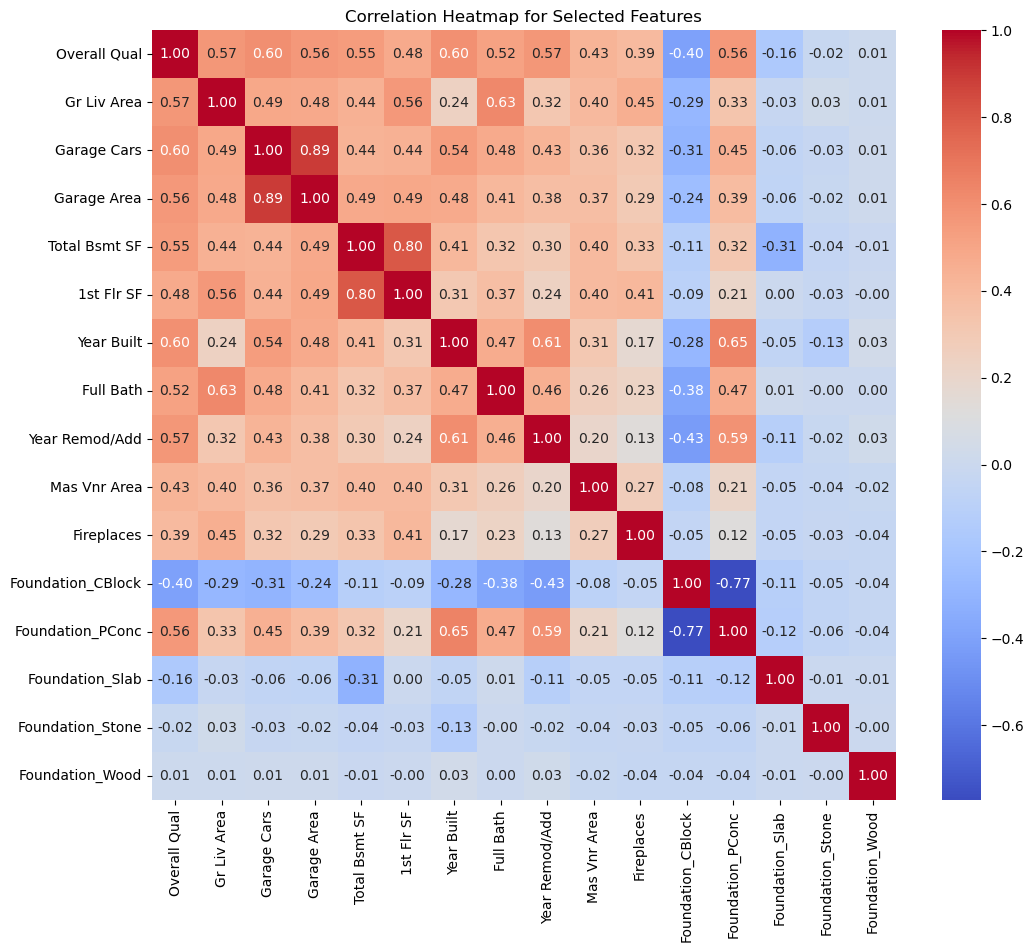

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [14]:
# Calculate correlation with SalePrice
corr_garage_cars = filtered_data['Year Built'].corr(filtered_data['SalePrice'])
corr_garage_area = filtered_data['Year Remod/Add'].corr(filtered_data['SalePrice'])

print(f"Correlation of Year Built with SalePrice: {corr_garage_cars}")
print(f"Correlation of Year Remod/Add with SalePrice: {corr_garage_area}")

Correlation of Year Built with SalePrice: 0.5584261057120452
Correlation of Year Remod/Add with SalePrice: 0.5329737540266953


In [15]:
# Calculate correlation with SalePrice
corr_garage_cars = filtered_data['Garage Cars'].corr(filtered_data['SalePrice'])
corr_garage_area = filtered_data['Garage Area'].corr(filtered_data['SalePrice'])

print(f"Correlation of Garage Cars with SalePrice: {corr_garage_cars}")
print(f"Correlation of Garage Area with SalePrice: {corr_garage_area}")

Correlation of Garage Cars with SalePrice: 0.6478765953956583
Correlation of Garage Area with SalePrice: 0.6404007669873958


In [16]:
corr_total_bsmt = filtered_data['Total Bsmt SF'].corr(filtered_data['SalePrice'])
corr_1st_flr = filtered_data['1st Flr SF'].corr(filtered_data['SalePrice'])

print(f"Correlation of Total Bsmt SF with SalePrice: {corr_total_bsmt}")
print(f"Correlation of 1st Flr SF with SalePrice: {corr_1st_flr}")


Correlation of Total Bsmt SF with SalePrice: 0.6322804571065125
Correlation of 1st Flr SF with SalePrice: 0.6216760632702533


In [17]:
# Select features with strong or moderate correlations
selected_features_check_2 = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 
    'Total Bsmt SF', 'Year Built', 'Full Bath', 'Mas Vnr Area', 'Fireplaces',
    'Foundation_CBlock','Foundation_PConc', 'Foundation_Slab',  'Foundation_Stone', 'Foundation_Wood'
]

# Compute the correlation matrix for the selected features
correlation_matrix_2 = filtered_data[selected_features_check_2].corr()

# Display the correlation matrix
correlation_matrix_2

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Mas Vnr Area,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
Overall Qual,1.000000,0.570556,0.599545,0.547294,0.597027,0.522263,0.429418,0.393007,-0.401357,0.561360,-0.161582,-0.023907,0.008942
Gr Liv Area,0.570556,1.000000,0.488829,0.444675,0.241726,0.630321,0.403611,0.454924,-0.286229,0.329733,-0.030694,0.026350,0.009891
Garage Cars,0.599545,0.488829,1.000000,0.437608,0.537443,0.478182,0.360159,0.321206,-0.306929,0.452820,-0.058019,-0.025213,0.012680
Total Bsmt SF,0.547294,0.444675,0.437608,1.000000,0.407526,0.324973,0.397040,0.333086,-0.111992,0.317994,-0.311367,-0.044937,-0.014250
Year Built,0.597027,0.241726,0.537443,0.407526,1.000000,0.469406,0.313292,0.170672,-0.282185,0.650877,-0.054344,-0.128059,0.032599
Full Bath,0.522263,0.630321,0.478182,0.324973,0.469406,1.000000,0.260153,0.229793,-0.378182,0.469118,0.010779,-0.002343,0.002501
Mas Vnr Area,0.429418,0.403611,0.360159,0.397040,0.313292,0.260153,1.000000,0.272068,-0.081594,0.210206,-0.048793,-0.035068,-0.019910
Fireplaces,0.393007,0.454924,0.321206,0.333086,0.170672,0.229793,0.272068,1.000000,-0.051750,0.122806,-0.050808,-0.030948,-0.038250
Foundation_CBlock,-0.401357,-0.286229,-0.306929,-0.111992,-0.282185,-0.378182,-0.081594,-0.051750,1.000000,-0.772431,-0.112023,-0.052730,-0.035514
Foundation_PConc,0.561360,0.329733,0.452820,0.317994,0.650877,0.469118,0.210206,0.122806,-0.772431,1.000000,-0.117275,-0.055202,-0.037179


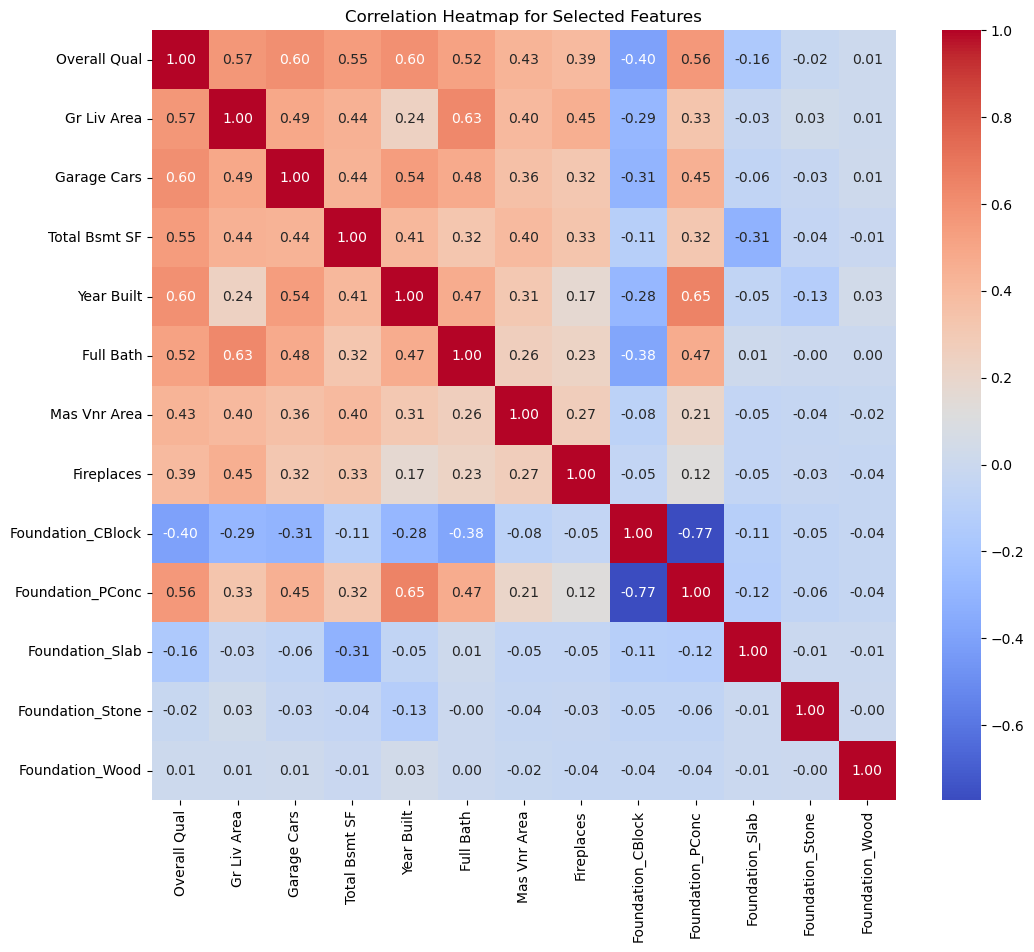

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [19]:
# Create a new DataFrame with the selected features and target variable
filtered_data = housing_data[selected_features_check_2 + ['SalePrice']]

#### The selected features, along with the target variable `SalePrice`, were used to create a filtered dataset.The filtered dataset is displayed below for reference:

In [20]:
# Display the first few rows of the filtered DataFrame
filtered_data.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Mas Vnr Area,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SalePrice
0,6,1656,2.0,1080.0,1960,1,112.0,2,True,False,False,False,False,215000
1,5,896,1.0,882.0,1961,1,0.0,0,True,False,False,False,False,105000
2,6,1329,1.0,1329.0,1958,1,108.0,0,True,False,False,False,False,172000
3,7,2110,2.0,2110.0,1968,2,0.0,2,True,False,False,False,False,244000
4,5,1629,2.0,928.0,1997,2,0.0,1,False,True,False,False,False,189900


In [21]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall Qual       2930 non-null   int64  
 1   Gr Liv Area        2930 non-null   int64  
 2   Garage Cars        2929 non-null   float64
 3   Total Bsmt SF      2929 non-null   float64
 4   Year Built         2930 non-null   int64  
 5   Full Bath          2930 non-null   int64  
 6   Mas Vnr Area       2907 non-null   float64
 7   Fireplaces         2930 non-null   int64  
 8   Foundation_CBlock  2930 non-null   bool   
 9   Foundation_PConc   2930 non-null   bool   
 10  Foundation_Slab    2930 non-null   bool   
 11  Foundation_Stone   2930 non-null   bool   
 12  Foundation_Wood    2930 non-null   bool   
 13  SalePrice          2930 non-null   int64  
dtypes: bool(5), float64(3), int64(6)
memory usage: 220.4 KB


### **2.2.5 Dataset Dimensions After Feature Selection**

Following the selection of features, the dataset dimensions were updated as follows:

- **Number of Rows:** 2,930 (representing the total number of observations in the dataset).
- **Number of Columns:** 14 (13 selected features and the target variable `SalePrice`).

This refined dataset focuses on the most relevant predictors while retaining all observations, ensuring a balance between efficiency and robustness for subsequent analysis and modeling.

In [22]:
filtered_data.shape

(2930, 14)

## **2.3 Handling Missing Values**

A clean and reliable dataset is crucial for effective modeling. To this end, the selected features and the target variable (`SalePrice`) were checked for missing values. Addressing missing data ensures that the model training and evaluation processes remain unaffected by data inconsistencies.

### **2.3.1 Summary of Missing Values**
The following features were identified as having missing values in the refined dataset:

- **GarageCars**: 1 missing value
- **TotalBsmtSF**: 1 missing value
- **MasVnrArea**: 23 missing values

In total, **25 missing values** were detected across these features.

In [23]:
# Check for missing values in the dataset
missing_summary = filtered_data.isnull().sum()
print("Missing Values Per Column:\n", missing_summary[missing_summary > 0])

# Verify that missing values have been handled
print("Missing Values After Handling:\n", filtered_data.isnull().sum().sum())

Missing Values Per Column:
 Garage Cars       1
Total Bsmt SF     1
Mas Vnr Area     23
dtype: int64
Missing Values After Handling:
 25


### **2.3.2 Handling Strategy for Missing Values**

#### **Handling Strategy**
- Rows containing missing values were **dropped entirely** from the dataset. This approach was chosen to avoid potential bias or inaccuracies that might arise from imputation.
- The reduction in dataset size was minimal, with less than **1%** of rows removed, ensuring negligible impact on the analysis and modeling process.

#### **Verification**
After implementing the strategy:
- The cleaned dataset contains **0 missing values**.
- **Original Dataset Size:** 2,930 rows and 12 columns.
- **Cleaned Dataset Size:** 2,905 rows and 12 columns.
- **Data Reduction:** Less than **1%** of the rows were removed.

This approach ensures that the dataset is free of missing values while preserving the vast majority of observations for analysis. The minimal data loss supports robust modeling without compromising data quality.

In [24]:
# Drop rows with any missing values
filtered_data_cleaned = filtered_data.dropna()

# Verify that missing values have been removed
print("Missing Values After Dropping:\n", filtered_data_cleaned.isnull().sum().sum())

# Display the size of the cleaned dataset
print(f"Original dataset size: {filtered_data.shape}")
print(f"Cleaned dataset size: {filtered_data_cleaned.shape}")

Missing Values After Dropping:
 0
Original dataset size: (2930, 14)
Cleaned dataset size: (2905, 14)


In [25]:
# Calculate the percentage reduction in dataset size
original_size = filtered_data.shape[0]
cleaned_size = filtered_data_cleaned.shape[0]
reduction_percentage = ((original_size - cleaned_size) / original_size) * 100

# Display the percentage reduction
print(f"Percentage reduction in dataset size: {reduction_percentage:.2f}%")

Percentage reduction in dataset size: 0.85%


In [26]:
filtered_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2905 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall Qual       2905 non-null   int64  
 1   Gr Liv Area        2905 non-null   int64  
 2   Garage Cars        2905 non-null   float64
 3   Total Bsmt SF      2905 non-null   float64
 4   Year Built         2905 non-null   int64  
 5   Full Bath          2905 non-null   int64  
 6   Mas Vnr Area       2905 non-null   float64
 7   Fireplaces         2905 non-null   int64  
 8   Foundation_CBlock  2905 non-null   bool   
 9   Foundation_PConc   2905 non-null   bool   
 10  Foundation_Slab    2905 non-null   bool   
 11  Foundation_Stone   2905 non-null   bool   
 12  Foundation_Wood    2905 non-null   bool   
 13  SalePrice          2905 non-null   int64  
dtypes: bool(5), float64(3), int64(6)
memory usage: 241.1 KB


## **2.4 Class Categorization and Distribution**

To adapt the `SalePrice` variable for classification, the following steps were undertaken to categorize it into discrete classes:

### **2.4.1 Categorization Process**

1. **Defining Price Ranges**:
   - The `SalePrice` variable was divided into three distinct categories based on defined price ranges:
     - **Low (0):** Properties priced up to **150,000** dollars.
     - **Medium (1):** Properties priced between **150,000 and 300,000** dollars.
     - **High (2):** Properties priced above **300,000** dollars.
2. **Encoding Categories**:
   - The categories were assigned numerical labels to facilitate classification:
     - `0`: Low
     - `1`: Medium
     - `2`: High

3. **Dataset Update**:
   - A new column, `PriceCategory`, was created to store the encoded class labels.
   - The original `SalePrice` column was removed from the dataset to ensure the use of only the categorized target variable in subsequent analysis.

4. **Updated Dataset**:
   - The updated dataset includes the original features and the newly categorized target variable (`PriceCategory`).

In [27]:
# Create a copy of the DataFrame
filtered_data_cleaned = filtered_data_cleaned.copy()

# Define bins for categorizing SalePrice
bins = [0, 150000, 300000, float('inf')]  # Define price ranges
labels = [0, 1, 2]  # Encoded categories: 0 = Low, 1 = Medium, 2 = High

# Create a new column for the categorized target variable
filtered_data_cleaned['PriceCategory'] = pd.cut(filtered_data_cleaned['SalePrice'], bins=bins, labels=labels)

# Drop the original SalePrice column
filtered_data_cleaned = filtered_data_cleaned.drop(columns=['SalePrice'])

# Display the first few rows of the updated dataset
filtered_data_cleaned.head()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Year Built,Full Bath,Mas Vnr Area,Fireplaces,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,PriceCategory
0,6,1656,2.0,1080.0,1960,1,112.0,2,True,False,False,False,False,1
1,5,896,1.0,882.0,1961,1,0.0,0,True,False,False,False,False,0
2,6,1329,1.0,1329.0,1958,1,108.0,0,True,False,False,False,False,1
3,7,2110,2.0,2110.0,1968,2,0.0,2,True,False,False,False,False,1
4,5,1629,2.0,928.0,1997,2,0.0,1,False,True,False,False,False,1


In [28]:
filtered_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2905 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Overall Qual       2905 non-null   int64   
 1   Gr Liv Area        2905 non-null   int64   
 2   Garage Cars        2905 non-null   float64 
 3   Total Bsmt SF      2905 non-null   float64 
 4   Year Built         2905 non-null   int64   
 5   Full Bath          2905 non-null   int64   
 6   Mas Vnr Area       2905 non-null   float64 
 7   Fireplaces         2905 non-null   int64   
 8   Foundation_CBlock  2905 non-null   bool    
 9   Foundation_PConc   2905 non-null   bool    
 10  Foundation_Slab    2905 non-null   bool    
 11  Foundation_Stone   2905 non-null   bool    
 12  Foundation_Wood    2905 non-null   bool    
 13  PriceCategory      2905 non-null   category
dtypes: bool(5), category(1), float64(3), int64(5)
memory usage: 221.4 KB


### **2.4.2 Class Distribution Analysis**

To better understand the distribution of the categorized target variable (`PriceCategory`), the occurrences and percentages of each category were calculated. This analysis provides insight into the balance of the dataset, which is critical for evaluating model performance, particularly in classification tasks.

#### **Class Distribution**
The `PriceCategory` column represents properties categorized into three classes:

- **0 (Low)**: Properties priced up to **150,000** dollars.
- **1 (Medium)**: Properties priced between **150,000 and 300,000** dollars.
- **2 (High)**: Properties priced above **300,000** dollars.

The following table summarizes the count and percentage of occurrences for each category:

| **PriceCategory** | **Count** | **Percentage** |
|-------------------|-----------|----------------|
| **1 (Medium)**    | 1,410     | 48.54%         |
| **0 (Low)**       | 1,269     | 43.68%         |
| **2 (High)**      | 226       | 7.78%          |

#### **Key Observations**
1. **Class Imbalance**:
   - The dataset is moderately imbalanced, with the **High (2)** category comprising only 7.78% of the total data.
   - The **Medium (1)** category is the largest, accounting for nearly half (48.54%) of the observations.

2. **Implications**:
   - The imbalance, particularly in the **High (2)** category, could impact the performance of classification models. Strategies such as resampling (oversampling or undersampling) or using class-weighted metrics may be required to address this.

In [29]:
# Count the number of occurrences for each category
category_counts = filtered_data_cleaned['PriceCategory'].value_counts()

# Calculate the percentage for each category
category_percentages = filtered_data_cleaned['PriceCategory'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame for better readability
category_summary = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages
})

# Display the summary
print(category_summary)

               Count  Percentage
PriceCategory                   
1               1410   48.537005
0               1269   43.683305
2                226    7.779690


## **2.5 Multicollinearity Analysis**

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, leading to inflated variances of their coefficients. This can make it difficult to interpret the contribution of individual predictors. To address this, multicollinearity was evaluated in two stages:
1. **Feature Selection**: Initially, multicollinearity was reduced by identifying pairs of highly correlated features (e.g., `GarageCars` and `GarageArea`) and retaining only the feature with the stronger correlation to `SalePrice`.
2. **Variance Inflation Factor (VIF) Analysis**: A formal VIF analysis was conducted after feature selection to validate that multicollinearity was within acceptable limits for the remaining features.

#### **Insights from VIF Analysis**
The VIF values for the selected features are as follows:

| **Feature**      | **VIF**     |
|-------------------|-------------|
| OverallQual       | 2.54        |
| GrLivArea         | 2.59        |
| GarageCars        | 1.87        |
| TotalBsmtSF       | 1.60        |
| YearBuilt         | 2.03        |
| FullBath          | 2.10        |
| MasVnrArea        | 1.36        |
| Fireplaces        | 1.35        |


All features have VIF values well below the commonly accepted threshold of 10, confirming that multicollinearity is not a significant concern in this dataset.The VIF analysis confirms the appropriateness of the selected features for the linear regression model. All predictors show low multicollinearity, supporting reliable model performance and interpretability. While specific VIF values for the one-hot encoded `Foundation` variable were not computed, its inclusion is justified by its binary nature and the absence of redundancy from the one-hot encoding process. This ensures compatibility with the regression framework and minimizes potential multicollinearity issues.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define the feature matrix (exclude the target variable)
X = filtered_data_cleaned.drop(columns=['PriceCategory','Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 
    'Foundation_Stone', 'Foundation_Wood'])

# Add a constant column for statsmodels VIF calculation
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column after VIF calculation
X = X.drop(columns=['Intercept'])

# Exclude the Intercept from the VIF DataFrame
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# Display the cleaned VIF values
print(vif_data)

         Feature       VIF
0   Overall Qual  2.544243
1    Gr Liv Area  2.590106
2    Garage Cars  1.869602
3  Total Bsmt SF  1.597325
4     Year Built  2.033843
5      Full Bath  2.097871
6   Mas Vnr Area  1.357479
7     Fireplaces  1.349757


## **2.6 Outlier Analysis**

Outliers in a dataset can significantly influence model performance, especially if they arise from data entry errors or represent unusual cases that do not reflect the broader population. However, in real estate data, many outliers are valid and reflect real-world variability, such as luxury properties or unique architectural features. To assess the presence and nature of outliers, boxplots were examined for each selected feature.

#### **Observations**
The following insights were gathered from the boxplots of the selected features:

1. **`OverallQual`:**
   - This feature is well-distributed, with an outlier observed at the lower end of the scale. This outlier represents a property with significantly lower quality, which is valid and reflective of the dataset's diversity.

2. **`GrLivArea`:**
   - Outliers above 3,000 square feet represent larger or luxury homes. These values are valid as they capture the upper range of property sizes.

3. **`GarageCars`:**
   - Properties with garages accommodating more than 3 cars are considered outliers. These observations reflect larger-than-average garages and are typical of high-value homes.

4. **`TotalBsmtSF`:**
   - Outliers with basement sizes exceeding 3,000 square feet were observed. These expansive basements are valid and provide important variability for high-end properties.

5. **`YearBuilt`:**
   - Outliers include properties built before 1900, representing historical homes. These observations are valid and contribute valuable insights into the influence of property age on pricing.

6. **`FullBath`:**
   - A single outlier was identified with 4 full bathrooms, reflecting a luxury home. This observation is valid for the dataset.

7. **`MasVnrArea`:**
   - Properties with masonry veneer areas above 400 square feet were identified as outliers. These values represent high-end construction and are valid.

8. **`Fireplaces`:**
   - Outliers include properties with more than 2 fireplaces, characteristic of larger or luxury homes.

#### **In Sum**
The observed outliers were deemed valid data points that represent real-world variability rather than errors or anomalies. These values contribute valuable information about unique or high-value properties and their influence on housing prices. As such, no adjustments were made to the dataset, and all features were retained in their original form for modeling.

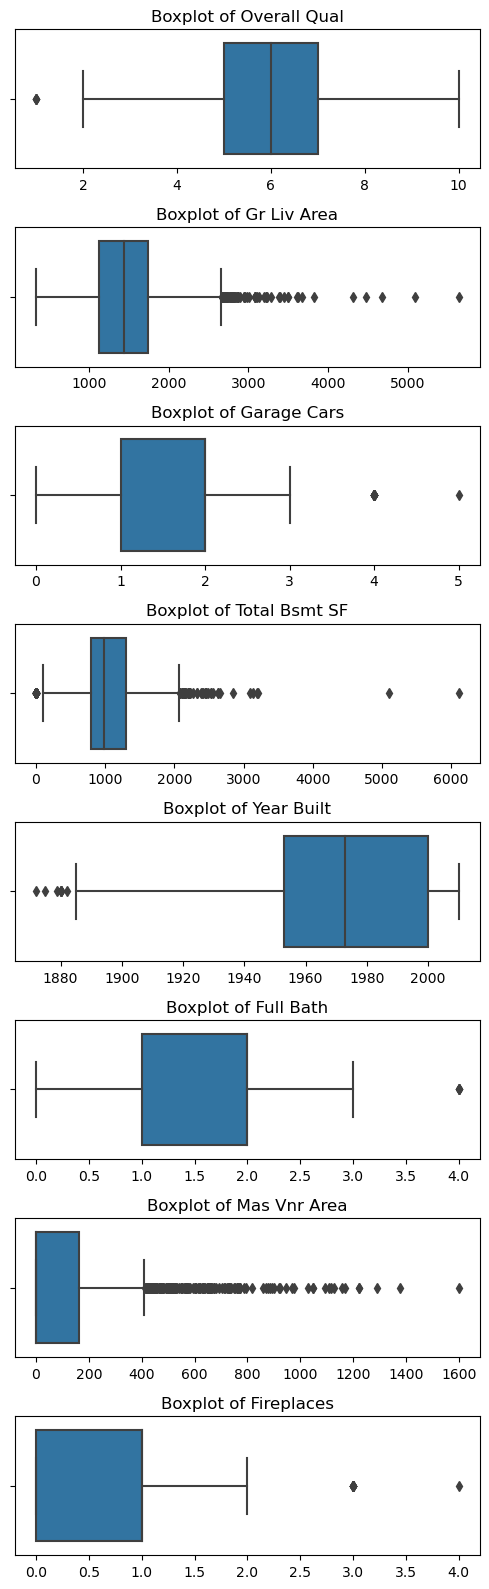

In [31]:
# Exclude 'Street_Pave' from the list of features
features_to_plot = [feature for feature in selected_features_check_2 if feature not in ['Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood']]

# Number of features to plot
num_features = len(features_to_plot)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(5, 2 * num_features))

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=filtered_data_cleaned[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')  # Optional: Remove x-axis label for cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## **2.7 Data Splitting**

To prepare the dataset for modeling, the following steps were taken to split the data into training and testing sets:

#### **Feature and Target Variable Separation**
- The dataset was divided into features (`X`) and the target variable (`y`):
  - **`X`**: All columns except the target variable, `PriceCategory`.
  - **`y`**: The `PriceCategory` column, representing the categorized property price ranges.

#### **Training and Testing Split**
- The dataset was split into training and testing sets using an 80-20 split ratio with a random seed (`random_state=42`) for reproducibility.
  - **Training Set Size**: 2,324 samples (80% of the dataset).
  - **Testing Set Size**: 581 samples (20% of the dataset).

#### **Target Variable Inspection**
- The `y_train` target variable includes all three classes (`Low`, `Medium`, and `High`), confirming that the split preserved the class categories for balanced training:
  - Unique classes in `y_train`: `[0, 1, 2]`, corresponding to `Low`, `Medium`, and `High`.

This data split ensures the model has a sufficient number of samples for training while holding out a separate set of data for unbiased evaluation.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = filtered_data_cleaned.drop(columns=['PriceCategory'])  # Features
y = filtered_data_cleaned['PriceCategory']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (2324, 13)
Testing set size: (581, 13)


In [34]:
y_train.unique()

[0, 2, 1]
Categories (3, int64): [0 < 1 < 2]

## **2.8 Addressing Class Imbalance**

To ensure balanced representation of all classes in the training data, Synthetic Minority Oversampling Technique (SMOTE) was applied to the dataset. This technique generates synthetic samples for underrepresented classes, addressing class imbalance and improving model performance.

#### **Steps Taken**
1. **Original Class Distribution**:
   - The training set initially exhibited an imbalanced distribution across the `PriceCategory` classes:
     - **Class 0 (Low)**: 1,021 samples
     - **Class 1 (Medium)**: 1,121 samples
     - **Class 2 (High)**: 182 samples

2. **Applying SMOTE**:
   - SMOTE was initialized with a random seed (`random_state=42`) for reproducibility.
   - It was applied to the training data (`X_train` and `y_train`) to generate synthetic samples for the minority classes.

3. **Resampled Class Distribution**:
   - After applying SMOTE, all classes were balanced with an equal number of samples:
     - **Class 0 (Low)**: 1,121 samples
     - **Class 1 (Medium)**: 1,121 samples
     - **Class 2 (High)**: 1,121 samples

#### **Outcome**
By balancing the training set using SMOTE:
- The model is less likely to be biased toward the majority class.
- The balanced dataset ensures that the model can learn to predict all classes more effectively, improving its overall performance in classification tasks.

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original Class Distribution:", Counter(y_train))
print("Resampled Class Distribution:", Counter(y_resampled))

Original Class Distribution: Counter({1: 1121, 0: 1021, 2: 182})
Resampled Class Distribution: Counter({0: 1121, 2: 1121, 1: 1121})


## **2.9 Feature Scaling**

To standardize the features and ensure they are on a similar scale, feature scaling was applied using the **StandardScaler** from `sklearn`. This step is crucial for improving the performance of the regression model, especially when features have varying units or magnitudes.

#### **Scaling Process**
1. **Initialization**:
   - The `StandardScaler` was used to normalize the feature values by removing the mean and scaling to unit variance.

2. **Scaling the Training Set**:
   - The scaler was fitted to the resampled training data (`X_resampled`) and applied to transform the features. This ensures the mean of each feature is zero, and the standard deviation is one.

3. **Scaling the Testing Set**:
   - The same scaler was applied to the testing data (`X_test`) to ensure consistency in feature scaling.

#### **Outcome**
- The scaled training set (`X_train_scaled`) and testing set (`X_test_scaled`) now have normalized feature values, which improves the regression model's performance by ensuring all features contribute equally to the predictions.

In [36]:
# Scale the features to normalize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# **3. linear regression model**

## **3.1 Model Training and Prediction**

### **3.1.1 Model Training**
1. **Model Selection**:
   - A linear regression model was selected to investigate its capability in solving a classification problem due to its simplicity, interpretability, and efficiency. Linear regression provides a straightforward approach to estimate the relationship between input features, including both continuous and one-hot encoded categorical variables, and the target variable. This choice also allows for an evaluation of how well a linear approximation can separate classes in a classification task and serves as a baseline model to compare against more complex approaches.

2. **Training the Model**:
   - The model was trained using the scaled training dataset (`X_train_scaled`) and the balanced target variable (`y_resampled`), which included:
     - Continuous features, such as `Gr Liv Area` and `Garage Area`.
     - One-hot encoded categorical variables, such as `Foundation_CBlock`, `Foundation_PConc`, etc.
   - The training process involved fitting the linear regression model to learn the relationship between the scaled features and their corresponding class labels.

### **3.1.2 Prediction**
1. **Making Predictions**:
   - The trained model was used to predict class labels on the scaled testing dataset (`X_test_scaled`), generating continuous output values.

2. **Converting Predictions to Class Categories**:
   - Continuous predictions were transformed into discrete class labels (`0`, `1`, or `2`) using:
     - **Rounding**: Predictions were rounded to the nearest integer.
     - **Clipping**: Predictions outside the valid range (0–2) were clipped to ensure valid class labels.

#### **Outcome**
- The predictions (`y_pred_class`) reflect the predicted property price categories (`Low`, `Medium`, or `High`) for the testing set.
- By including both continuous and categorical variables, the model leveraged a diverse set of predictors to make informed predictions. This ensures the impact of categorical variables, such as `Foundation`, is accounted for alongside continuous features, enhancing the model's interpretability and performance.

In [37]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_resampled)

LinearRegression()

In [38]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [39]:
# Convert predictions to class categories (0, 1, 2)
y_pred_class = np.round(y_pred).clip(0, 2)  # Ensure predictions are within valid range

## **3.2 Model Evaluation**

#### **Accuracy**
The linear regression model achieved an accuracy of **84.17%**, indicating that the model correctly classified 84.17% of the test samples.

#### **Confusion Matrix**
The confusion matrix illustrates the model's classification performance for each class (`Low`, `Medium`, and `High`):

|                | Predicted Low | Predicted Medium | Predicted High |
|----------------|---------------|------------------|----------------|
| **Actual Low** | 205           | 42               | 1              |
| **Actual Medium** | 22           | 243              | 24             |
| **Actual High** | 0             | 3                | 41             |

#### **Classification Report**
The classification report provides detailed metrics for each class:

| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Low         | 0.90      | 0.83   | 0.86     | 248     |
| Medium      | 0.84      | 0.84   | 0.84     | 289     |
| High        | 0.62      | 0.93   | 0.75     | 44      |
| **Accuracy**|           |        | **0.84** | 581     |
| **Macro Avg** | 0.79    | 0.87   | 0.82     | 581     |
| **Weighted Avg** | 0.85 | 0.84   | 0.84     | 581     |

#### **Key Insights**
- **Class Performance**:
  - The model performed well for the `Low` and `Medium` categories, with high precision and recall.
  - The `High` category exhibited lower precision (0.62) due to its smaller representation in the dataset but achieved a strong recall (0.93), indicating most `High` properties were correctly identified.

- **Balanced Metrics**:
  - The **macro-average F1-score** of **0.82** indicates balanced performance across all classes, regardless of class size.
  - The **weighted-average F1-score** of **0.84** confirms that the model handles the class imbalance effectively.

#### **Discussion**
- **Strengths**:
  - The model demonstrated strong predictive power for the `Low` and `Medium` categories, which represent the majority of the dataset.
  - The use of SMOTE for balancing classes contributed to improved recall for the `High` category.

- **Limitations**:
  - The model's precision for the `High` category is relatively lower, likely due to the small number of samples in this class, which limits the model's ability to generalize.

#### **In Sum**
The linear regression model, adapted for classification, achieved strong overall performance with an accuracy of **84.17%** and balanced metrics across all classes. These results demonstrate the feasibility of using regression techniques for classification tasks when supported by proper preprocessing and evaluation strategies.

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class, target_names=["Low", "Medium", "High"])  # Update target names if necessary

In [41]:
# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 84.17%

Confusion Matrix:
 [[205  42   1]
 [ 22 243  24]
 [  0   3  41]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.90      0.83      0.86       248
      Medium       0.84      0.84      0.84       289
        High       0.62      0.93      0.75        44

    accuracy                           0.84       581
   macro avg       0.79      0.87      0.82       581
weighted avg       0.85      0.84      0.84       581



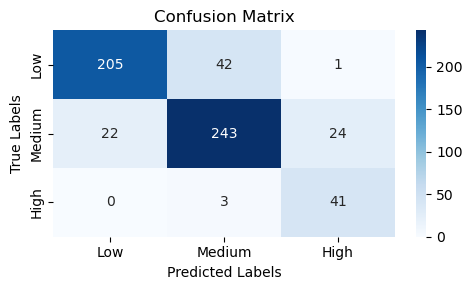

In [42]:
# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

## **3.3 Model Refinement**
To refine the linear regression model, we performed an Ordinary Least Squares (OLS) analysis to identify significant and insignificant variables.

### **3.3.1 OLS Regression Analysis for Model Refinement**

#### **Key Findings**
1. **Significant Variables**:
   - The following variables were found to be statistically significant (p-value < 0.05), indicating a meaningful contribution to predicting `PriceCategory`:
     - **Overall Qual**
     - **Gr Liv Area**
     - **Garage Cars**
     - **Total Bsmt SF**
     - **Year Built**
     - **Fireplaces**
     - **Foundation_CBlock**
     - **Foundation_PConc**
     - **Foundation_Slab**

2. **Insignificant Variables**:
   - The following variables were found to be statistically insignificant (p-value ≥ 0.05), suggesting limited or no contribution to the model:
     - **Full Bath**
     - **Mas Vnr Area**
     - **Foundation_Stone**
     - **Foundation_Wood**

#### **Next Steps**
- To streamline the model and improve interpretability, the insignificant variables will be removed.
- The OLS regression model will be re-run with only the significant variables to evaluate the impact of this adjustment on model performance.

In [43]:
import statsmodels.api as sm

# Add a constant to the features for OLS
X_train_ols = sm.add_constant(X_train_scaled)

# Fit the OLS model
ols_model = sm.OLS(y_resampled, X_train_ols).fit()

# Display the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          PriceCategory   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:11:24   Log-Likelihood:                -1279.4
No. Observations:                3363   AIC:                             2587.
Df Residuals:                    3349   BIC:                             2672.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      0.006    163.484      0.0

In [44]:
print(X_train.columns)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
       'Year Built', 'Full Bath', 'Mas Vnr Area', 'Fireplaces',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood'],
      dtype='object')


### 3.3.2 Model Update After Removing Insignificant Variables
#### **Model Update**
After removing the statistically insignificant variables (**Full Bath**, **Mas Vnr Area**, **Foundation_Stone**, and **Foundation_Wood**), the regression model was re-trained using only the significant predictors. The model was then evaluated on the testing set.

#### **Evaluation Metrics**
1. **Accuracy**:
   - The model achieved an accuracy of **84.17%**, identical to the original model, indicating that the removed variables had minimal impact on predictive performance.

2. **Confusion Matrix**:
   - The confusion matrix for the updated model:
     |                | Predicted Low | Predicted Medium | Predicted High |
     |----------------|---------------|------------------|----------------|
     | **Actual Low** | 206           | 41               | 1              |
     | **Actual Medium** | 23           | 242              | 24             |
     | **Actual High** | 0             | 3                | 41             |

3. **Classification Report**:
   - Detailed performance metrics for each class:
     | Class       | Precision | Recall | F1-Score | Support |
     |-------------|-----------|--------|----------|---------|
     | Low         | 0.90      | 0.83   | 0.86     | 248     |
     | Medium      | 0.85      | 0.84   | 0.84     | 289     |
     | High        | 0.62      | 0.93   | 0.75     | 44      |
     | **Accuracy**|           |        | **0.84** | 581     |
     | **Macro Avg** | 0.79    | 0.87   | 0.82     | 581     |
     | **Weighted Avg** | 0.85 | 0.84   | 0.84     | 581     |

#### **Key Insights**
- The removal of insignificant variables resulted in no change in the overall accuracy of the model (**84.17%**).
- The class-level metrics (precision, recall, F1-score) remained consistent, demonstrating that the removed variables had little to no predictive value.
- The **macro-average F1-score** and **weighted-average F1-score** also stayed stable at **0.82** and **0.84**, respectively.

#### **Discussion**
- **Benefits of Removal**:
  - The model is now simpler and easier to interpret, as only meaningful predictors are included.
  - Removing statistically insignificant variables aligns with best practices, avoiding overfitting and unnecessary complexity.

- **Trade-offs**:
  - While no significant trade-offs were observed in this case, retaining insignificant variables can sometimes marginally influence predictions due to random noise.

#### **In Sum**
The updated model with significant variables achieves the same level of performance as the original model, confirming that the removed variables did not contribute meaningfully. This streamlined approach improves model interpretability without compromising accuracy or classification quality.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Define significant features (update with real feature names)
significant_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built',
                        'Fireplaces', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab'] 

# Select significant features from the resampled data
X_resampled_sig = X_resampled[significant_features]

# Scale the significant features
scaler_sig = StandardScaler()
X_resampled_sig_scaled = scaler_sig.fit_transform(X_resampled_sig)
X_test_sig_scaled = scaler_sig.transform(X_test[significant_features])

# Train the Linear Regression model using resampled data
model_sig = LinearRegression()
model_sig.fit(X_resampled_sig_scaled, y_resampled)

# Predict on the test set
y_pred_sig = model_sig.predict(X_test_sig_scaled)

# Convert predictions to class categories (0, 1, 2)
y_pred_sig_class = np.round(y_pred_sig).clip(0, 2)

# Evaluate the model
accuracy_sig = accuracy_score(y_test, y_pred_sig_class)
conf_matrix_sig = confusion_matrix(y_test, y_pred_sig_class)
class_report_sig = classification_report(y_test, y_pred_sig_class, target_names=["Low", "Medium", "High"])

# Print evaluation results
print(f"Accuracy (Significant Variables): {accuracy_sig * 100:.2f}%")
print("\nConfusion Matrix (Significant Variables):\n", conf_matrix_sig)
print("\nClassification Report (Significant Variables):\n", class_report_sig)

Accuracy (Significant Variables): 84.17%

Confusion Matrix (Significant Variables):
 [[206  41   1]
 [ 23 242  24]
 [  0   3  41]]

Classification Report (Significant Variables):
               precision    recall  f1-score   support

         Low       0.90      0.83      0.86       248
      Medium       0.85      0.84      0.84       289
        High       0.62      0.93      0.75        44

    accuracy                           0.84       581
   macro avg       0.79      0.87      0.82       581
weighted avg       0.85      0.84      0.84       581



## **3.4 Residual Analysis**

As part of the evaluation of the linear regression model, residual analysis was performed to assess the assumptions of normality and homoscedasticity. While linear regression is not inherently designed for classification tasks, these diagnostics help evaluate the applicability of this approach in this context.



### **3.4.1 Residual Normality**
- The distribution of residuals was examined using a histogram and the Shapiro-Wilk test.
- **Findings:**
  - The Shapiro-Wilk test resulted in a **p-value = 0.0269**, indicating that the residuals deviate from normality.
  - The histogram of residuals shows most values clustered around zero, but with slight deviations, reflecting non-normality.
- **Interpretation:**
  - The lack of normality is not unexpected since linear regression is being applied to a classification problem. In this context, the deviation from normality does not significantly impact the model's classification performance.



### **3.4.2 Homoscedasticity**
- A residuals vs. predicted values plot was analyzed to evaluate the assumption of constant variance.
- **Findings:**
  - The plot shows distinct bands corresponding to the predicted classes (`Low`, `Medium`, `High`), which is characteristic of applying linear regression to a classification problem.
  - The variance of residuals is not constant, violating the assumption of homoscedasticity.
- **Interpretation:**
  - This pattern reflects a limitation of using linear regression for classification, as it outputs continuous predictions that are thresholded into discrete classes. Despite this limitation, the model achieved reasonable classification performance.



### **3.4.3 Impact on Results**
- The violations of normality and homoscedasticity are inherent limitations of this methodology but do not invalidate the model's results.
- The focus remains on classification performance metrics, which are more relevant for evaluating the model's suitability in this task.



### **3.4.4 Recommendation**
- It is recommended to use classification-specific models, such as logistic regression, decision trees, or random forests, in future applications. These models do not impose assumptions of normality or homoscedasticity and are optimized for categorical outputs, making them more appropriate for this task.

C:\Users\lasra\anaconda3-2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


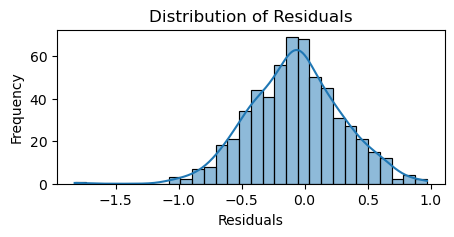

Shapiro-Wilk Test Statistic: 0.9943773287264446, p-value: 0.030725730768079884
Residuals do not appear to be normally distributed.


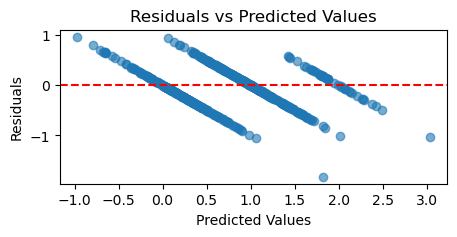

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder

# Encode y_test if not already encoded
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Ensure residuals use numeric encoded values
y_pred_continuous = model_sig.predict(X_test_sig_scaled)  # Continuous predictions
residuals = y_test_encoded - y_pred_continuous  # Residuals (difference between true numeric labels and predicted values)

# Plot the distribution of residuals
plt.figure(figsize=(5, 2))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Shapiro-Wilk Test for Normality of Residuals
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print("Residuals appear to be normally distributed.")
else:
    print("Residuals do not appear to be normally distributed.")

# Homoscedasticity Check: Residuals vs. Predicted Values
plt.figure(figsize=(5, 2))
plt.scatter(y_pred_continuous, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [47]:
print(f"NaN values in residuals: {np.isnan(residuals).sum()}")
print(f"Inf values in residuals: {np.isinf(residuals).sum()}")
print("As we do not have any NaN or infinite values in the residuals, we can safely ignore the warning.")

NaN values in residuals: 0
Inf values in residuals: 0
As we do not have any NaN or infinite values in the residuals, we can safely ignore the warning.


# **4. Logistic Regression Model**
We applied a logistic regression model, a traditional classifier, to the same dataset to compare its results with those of the linear regression model

## **4.1 Logistic Regression Results**

#### **Evaluation Metrics**

1. **Accuracy**:
   - The logistic regression model achieved an accuracy of **86.40%**, surpassing the performance of the linear regression model.

2. **Confusion Matrix**:
   - The confusion matrix for the logistic regression model is as follows:

     |                | Predicted Low | Predicted Medium | Predicted High |
     |----------------|---------------|------------------|----------------|
     | **Actual Low** | 216           | 31               | 1              |
     | **Actual Medium** | 34           | 250              | 5              |
     | **Actual High** | 0             | 8                | 36             |

3. **Classification Report**:
   - Performance metrics for each class are summarized below:

     | Class       | Precision | Recall | F1-Score | Support |
     |-------------|-----------|--------|----------|---------|
     | Low         | 0.86      | 0.87   | 0.87     | 248     |
     | Medium      | 0.87      | 0.87   | 0.87     | 289     |
     | High        | 0.86      | 0.82   | 0.84     | 44      |
     | **Accuracy**|           |        | **0.86** | 581     |
     | **Macro Avg** | 0.86    | 0.85   | 0.86     | 581     |
     | **Weighted Avg** | 0.86 | 0.86   | 0.86     | 581     |



#### **Key Insights**

1. **Class Performance**:
   - The model demonstrates **balanced precision, recall, and F1-scores** across all categories.
   - The **High** category (smaller class size) achieves slightly lower recall (0.82) but still maintains high precision (0.86).
   - Both the **Low** and **Medium** categories perform strongly with precision, recall, and F1-scores of **0.86-0.87**.

2. **Macro and Weighted Averages**:
   - The **macro average F1-score** of **0.86** reflects balanced performance across all classes.
   - The **weighted average F1-score** of **0.86** accounts for class proportions and confirms consistent model performance.



## **4.2 Comparison with Linear Regression**
- The logistic regression model outperforms the linear regression model, improving accuracy from **84.17%** to **86.40%**.
- Precision, recall, and F1-scores are higher across most categories, especially for the smaller **High** category.



#### **In Sum**
The logistic regression model demonstrates strong performance for this classification task, achieving **86.40% accuracy** and balanced metrics across all categories. This makes it a better-suited method compared to linear regression for solving classification problems, particularly with categorical target variables.

## **4.3 Why Logistic Regression Outperforms Linear Regression Even with Balanced Classes**

The logistic regression model demonstrates superior performance compared to linear regression for this classification task, achieving 86.40% accuracy. This is true even after addressing class imbalance, due to the fundamental design differences between the two models:

#### **1. Tailored for Classification**
- **Logistic regression** is explicitly designed for classification problems. It models the probability of each class using a sigmoid (logistic) function, outputting values between 0 and 1. These probabilities align well with categorical target variables, enabling direct thresholding for class assignments.
- **Linear regression**, by contrast, predicts continuous values, requiring post-processing (e.g., rounding or thresholding) to convert outputs to discrete class labels. This process often leads to inaccurate decision boundaries and suboptimal predictions.

#### **2. Optimized Decision Boundaries**
- Logistic regression maximizes the likelihood of correctly classifying samples, optimizing for class separation directly. This results in decision boundaries better aligned with the underlying data structure.
- Linear regression minimizes mean squared error, which focuses on reducing prediction error for continuous values rather than separating classes, leading to suboptimal classification.

#### **3. Handling Categorical Target Variables**
- Logistic regression inherently handles categorical target variables by estimating probabilities for each class. This aligns naturally with the discrete structure of classification tasks.
- Linear regression assumes a continuous target and fails to capture the categorical nature of the output, leading to less precise modeling.

#### **4. Robust Probability Estimates**
- Logistic regression produces probabilities that are calibrated and interpretable, allowing for meaningful confidence levels in predictions.
- Linear regression does not natively provide probabilities, and its raw outputs often lack interpretability for classification.

#### **5. Improved Performance Even with Balanced Classes**
- By balancing the dataset using techniques such as SMOTE, the performance of both models improves. However, logistic regression retains its advantage because:
  - It optimizes for classification-specific objectives, rather than overall error minimization.
  - It better leverages the adjusted data distribution to model class probabilities.

#### **In Sum**
Even with balanced classes, logistic regression remains a more effective method for classification tasks due to its focus on probability modeling, optimized decision boundaries, and compatibility with categorical target variables. These characteristics enable logistic regression to outperform linear regression consistently in classification scenarios. 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target (y)
X = filtered_data_cleaned.drop(columns=['PriceCategory'])  # Features
y = filtered_data_cleaned['PriceCategory']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable (PriceCategory: Low, Medium, High)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Scale the features to normalize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_class = model.predict(X_test_scaled)

# Convert numeric class labels to string labels for the classification report
class_labels = ["Low", "Medium", "High"]  # Define your class names explicitly

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_class)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_class)
class_report = classification_report(y_test_encoded, y_pred_class, target_names=class_labels)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 86.40%

Confusion Matrix:
 [[216  31   1]
 [ 34 250   5]
 [  0   8  36]]

Classification Report:
               precision    recall  f1-score   support

         Low       0.86      0.87      0.87       248
      Medium       0.87      0.87      0.87       289
        High       0.86      0.82      0.84        44

    accuracy                           0.86       581
   macro avg       0.86      0.85      0.86       581
weighted avg       0.86      0.86      0.86       581



# 5. Limitations

While this study demonstrated the feasibility of using linear regression for classification and highlighted the superior performance of logistic regression, several limitations should be acknowledged:

#### Applicability of Linear Regression
- Linear regression is not inherently designed for classification tasks, which led to violations of key assumptions such as normality and homoscedasticity in residual analysis. These issues may limit the interpretability and robustness of its results.

#### Class Imbalance
- Despite addressing class imbalance with SMOTE, the smaller *High* category remained challenging for both models, as indicated by slightly lower precision and recall.

#### Dataset-Specific Results
- The findings of this study are specific to the Ames Housing dataset and may not generalize to other datasets with different characteristics or class distributions.

#### Feature Selection Simplifications
- Feature selection relied on correlation and p-values, which may not fully capture complex, nonlinear relationships between predictors and the target variable. Advanced feature selection methods could provide additional insights.

# 6. Conclusion

This study explored the use of linear regression for classification and compared its performance to logistic regression on the Ames Housing dataset. While linear regression achieved a respectable accuracy of 84.17%, logistic regression outperformed it with an accuracy of 86.40%, demonstrating superior performance in handling categorical target variables.

### Key Insights

- **Model Suitability**: Logistic regression is inherently better suited for classification due to its ability to optimize decision boundaries and provide interpretable probability estimates.
- **Class Imbalance Handling**: SMOTE effectively balanced the dataset, allowing both models to improve their performance, particularly for the underrepresented *High* category.
- **Feature Refinement**: Removing insignificant variables improved model interpretability without sacrificing accuracy.
- **Limitations of Linear Regression**: Residual analysis revealed deviations from normality and heteroscedasticity, underscoring the challenges of applying regression techniques to classification tasks.

### Final Thoughts

In conclusion, logistic regression is recommended for classification tasks due to its robustness, interpretability, and ability to handle categorical outputs effectively. Future work could explore advanced classifiers like random forests or gradient boosting to further enhance performance and address limitations observed in this study.